c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.93


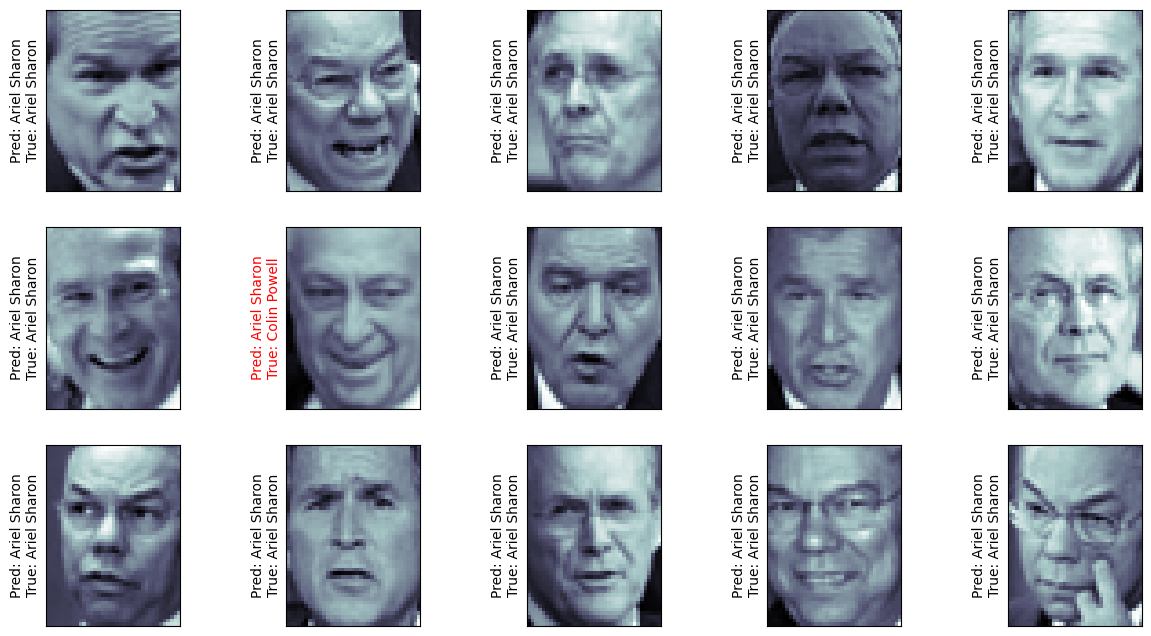

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people #사람얼굴 데이터 세트 모듈
from sklearn.ensemble import AdaBoostClassifier #에이다 부스트 분류기
from sklearn.tree import DecisionTreeClassifier #결정 트리 분류기
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#노이즈 추가 함수
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images,0,255)
    return noisy_images
                                               
# LFW(얼굴 데이터셋) 데이터 로드
# min_faces_person = 사람당 최소 얼굴 개수 예) 홍길동 -> 최소 얼굴 사진 70개, resize=0.4 실제 사진에서 축소
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# 데이터와 라벨 준비
# x: 얼굴 이미지 y: 사람 식별 번호
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names # 사람 이름

# 특정 인물만 골라 분류하기 (예: Ariel Sharon)
y = (y == np.where(target_names == 'Ariel Sharon')[0][0]).astype(int)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#노이즈 추가
X_train_noisy = add_noise(X_train, noise_factor=0.01)
X_test_noisy = add_noise(X_test, noise_factor=0.01)

# AdaBoost 분류기 설정
# DecisionTreeClassifier를 약한 학습자로 사용
base_estimator = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=0)

# 모델 훈련
adaboost.fit(X_train, y_train)

# 예측 및 평가
y_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

# 예측 결과 시각화
fig, ax = plt.subplots(3, 5, figsize=(15, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(50, 37), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(f'Pred: {target_names[y_pred[i]]}\nTrue: {target_names[y_test[i]]}',
                   color='black' if y_pred[i] == y_test[i] else 'red')
plt.show()
